Project 3 - Regression analysis of Gapminder data
Collaborators: Bennett Von Ancken, Diego Lopez

In [82]:
import pandas as pd

data1 = pd.read_csv("./gap.tsv", sep='\t')

data1.head()


,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


**Exercise 1**: *Make a scatter plot of life expectancy across time.*

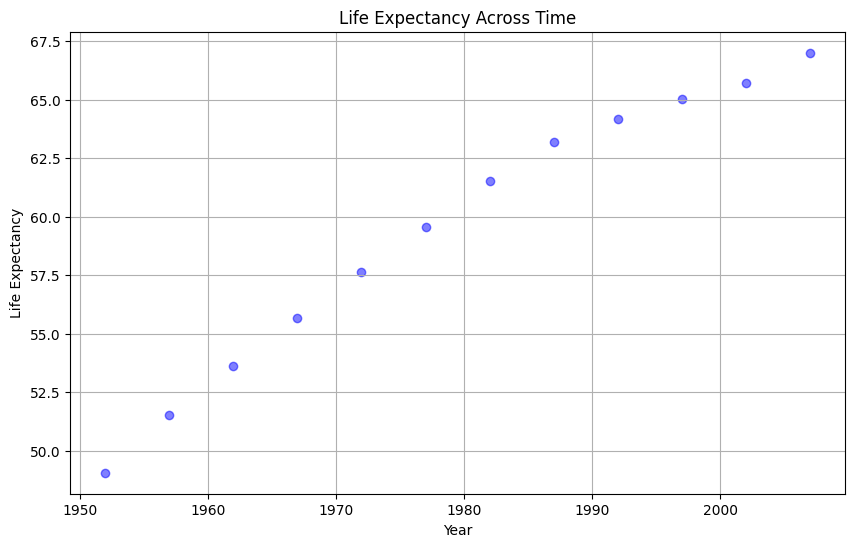

In [83]:
import matplotlib.pyplot as plt

mean_life_exp = data1.groupby(['year'])['lifeExp'].mean()

plt.figure(figsize=(10, 6))
plt.scatter(mean_life_exp.index, mean_life_exp.values, color='blue', alpha=0.5)
plt.title('Life Expectancy Across Time')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.show()

This code groups the data by life expectancy and year and plots the means of the data to generate a scatter plot.

**Question 1**: *Is there a general trend (e.g., increasing or decreasing) for life expectancy across time? Is this trend linear? (answering this qualitatively from the plot, you will do a statistical analysis of this question shortly)*

The life expectancy increases across time. This trend is fairly linear from looking at the plot.

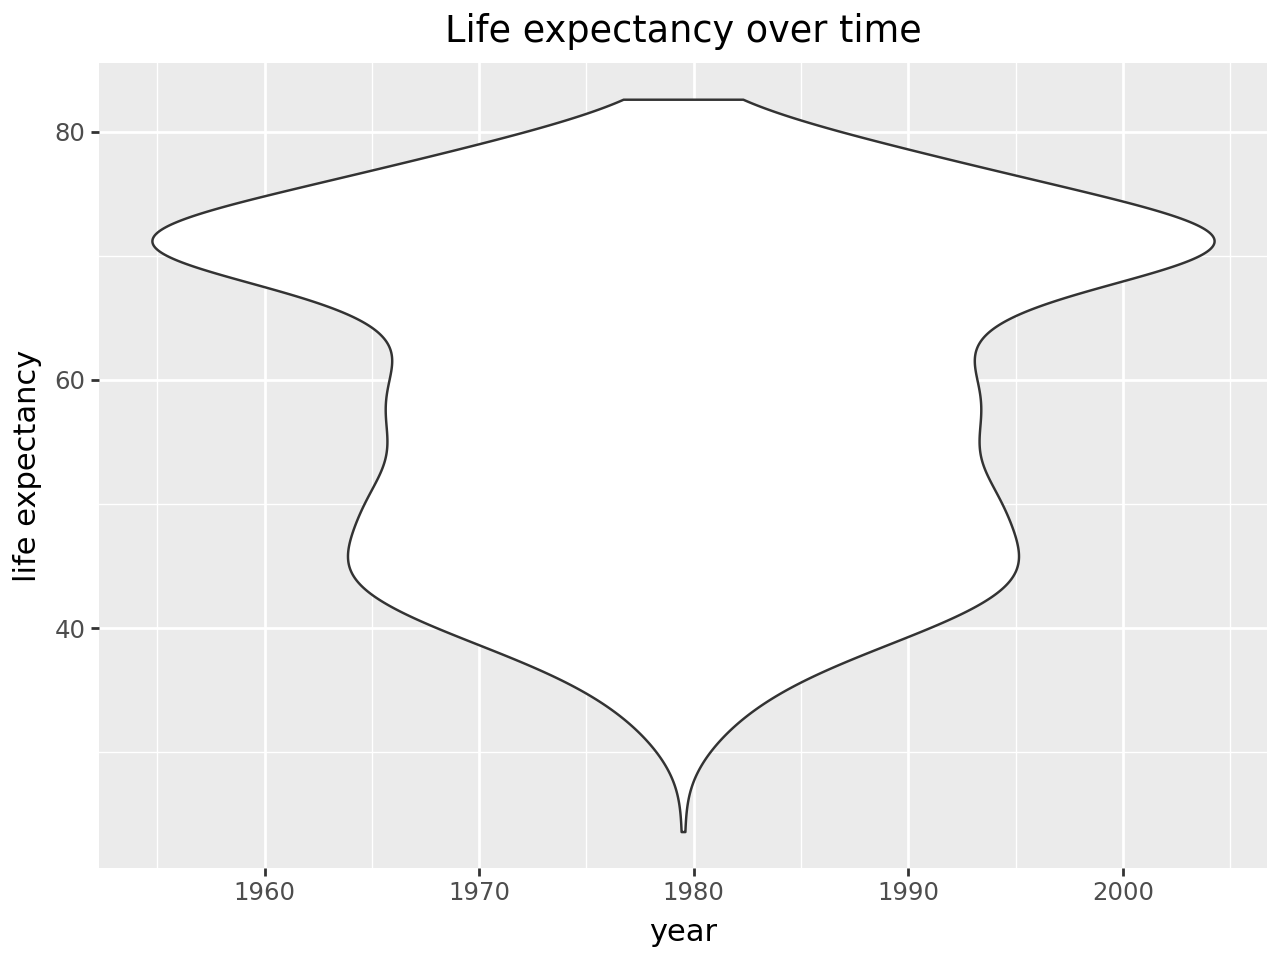

In [84]:
from seaborn import *
(
    ggplot(data1, aes(x='year', y='lifeExp')) +\
    geom_violin() +\
    labs(title="Life expectancy over time",
         x="year",
         y="life expectancy")
)

This code creates a violin plot with the seaborn ggplot function.

*The graph above was not used to answer the following question*

**Question 2**: How would you describe the distribution of life expectancy across countries for individual years? Is it skewed, or not? Unimodal or not? Symmetric around it’s center?

The distribution is skewed towards higher life expectancies then lower life expectancies. The distribution is not unimodal as it possesses multiple single highest values. The distributions are all symmetric around their own centers but the graph is not symmetric about its center.

**Question 3**: Suppose I fit a linear regression model of life expectancy vs. year (treating it as a continuous variable), and test for a relationship between year and life expectancy, will you reject the null hypothesis of no relationship? (do this without actually writing the code and fitting the model yet. I am testing your intuition.)

I would reject the null hypothesis as their appears to be a direct increase in the life expectancy as the years go on. This would also make sense when thinking of the real world factors such as improvement of living, technology, and medicine.

**Question 4**: What would a violin plot of residuals (errors) from the linear model in Question 3 vs. year look like? (Again, don’t do the analysis yet, answer this intuitively). You would answer this question in the context of the variables in Question 3.

The violin plot should have symettry for each year being represented, and have constent varience to show that the error difference remains around the same for each year. The shape should be random as error should not be able to be predicted.

**Question 5**: According to the assumptions of the linear regression model, what should that violin plot look like? You would answer this question as a general property of the residuals of the linear regression. We are looking to see if the Question 3 model fits the general assumptions.

The violin plots should represent a normal distribution or bell curve where the values cluster around zero. The violins should be independent of one another because the error variance isn't dependent on the other years corresponding values. 

**Exercise 2**: Fit a linear regression model using, e.g., the `LinearRegression` function from Scikit-Learn or the closed-form solution we derived in class, for life expectancy vs. year (as a continuous variable). 

In [85]:
from sklearn.linear_model import LinearRegression

X = data1[['year']]
y = data1['lifeExp']

model = LinearRegression()
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])

Intercept: -585.6521874415448
Slope: 0.3259038276371518


Use the scikit-learn linear regression function to find hte intercept and slope of the linear regression.

**Question 6**: On average, by how much does life expectancy increase every year around the world? To find the p-value and other statistics, you may use statsmodels.formula.api library. In that library there is a function for ordinary least squares. for example,

In [86]:
import statsmodels.api as sm

model = sm.formula.ols(formula="lifeExp ~ year", data=data1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     398.6
Date:                Sun, 31 Mar 2024   Prob (F-statistic):           7.55e-80
Time:                        17:04:37   Log-Likelihood:                -6597.9
No. Observations:                1704   AIC:                         1.320e+04
Df Residuals:                    1702   BIC:                         1.321e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -585.6522     32.314    -18.124      0.0

This code uses the statsmodels.formula.api to generate an OLS summary to see various information on the model

As seen by the results the life expectancy increases very lighly by 0.3259 each year, which actually means it will increase around 1 year every 3 years which is really great progress. THe p-value is less than 0.05 which means that this slope is supported by the data meaning it is close to reality.

**Question 7**: Do you reject the null hypothesis of no relationship between year and life expectancy? Why?

I do reject the null hypothesis of no relationship as the p-value being less than 0.05 shows a direct correlation between the two, where as the year progress the life expectancy will increase.

**Exercise 3**: Make a violin plot of residuals vs. year for the linear model from Exercise 2.

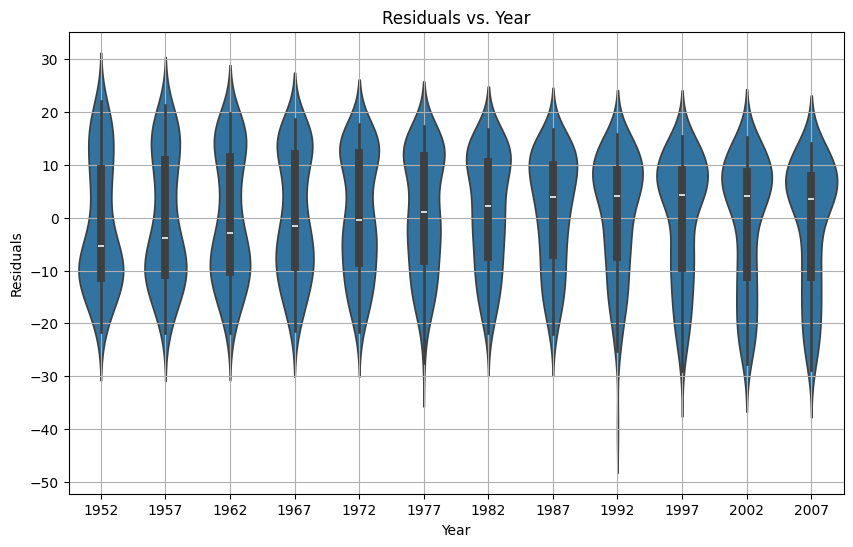

In [87]:
import seaborn as sns
residuals = data1['lifeExp'] - model.predict()

# Create a DataFrame to hold residuals and year
residuals_df = pd.DataFrame({'Year': data1['year'], 'Residuals': residuals})

# Create violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Year', y='Residuals', data=residuals_df)
plt.title('Residuals vs. Year')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

This code makes various violin plots with a pandas dataframe.

**Question 8**:  Does the plot of Exercise 3 match your expectations (as you answered Question 4)?

The plot does match my expectations pretty closely as the distributions appear to be random, symmetrical, and stretched.

**Exercise 4**:  Make a boxplot (or violin plot) of model residuals vs. continent.

/tmp/ipykernel_4109/2441773808.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



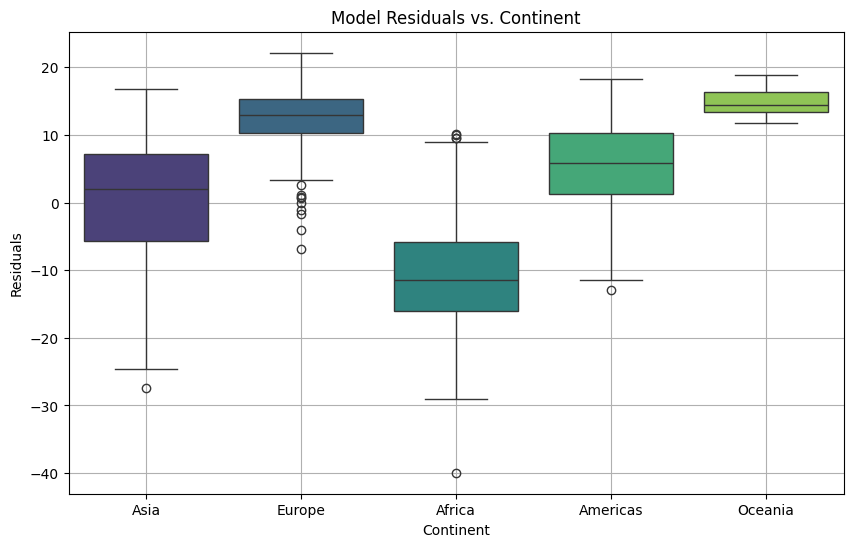

In [88]:
data1['Residuals'] = residuals

plt.figure(figsize=(10, 6))
sns.boxplot(x='continent', y='Residuals', data=data1, palette='viridis')
plt.title('Model Residuals vs. Continent')
plt.xlabel('Continent')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

Uses the boxplot function to create box plots for the various continents compared to residuals.

**Question 9**:  Is there a dependence between model residual and continent? If so, what would that suggest when performing a regression analysis of life expectancy across time?

There is a dependence between model riesudal and continent as seen by each one being very different. That would suggest that the continent should be considered when performing a regression analysis of life expectancy across time.

**Exercise 5**:  As in the Moneyball project, make a scatter plot of life expectancy vs. year, grouped by continent, and add a regression line.

<Figure size 1200x800 with 0 Axes>

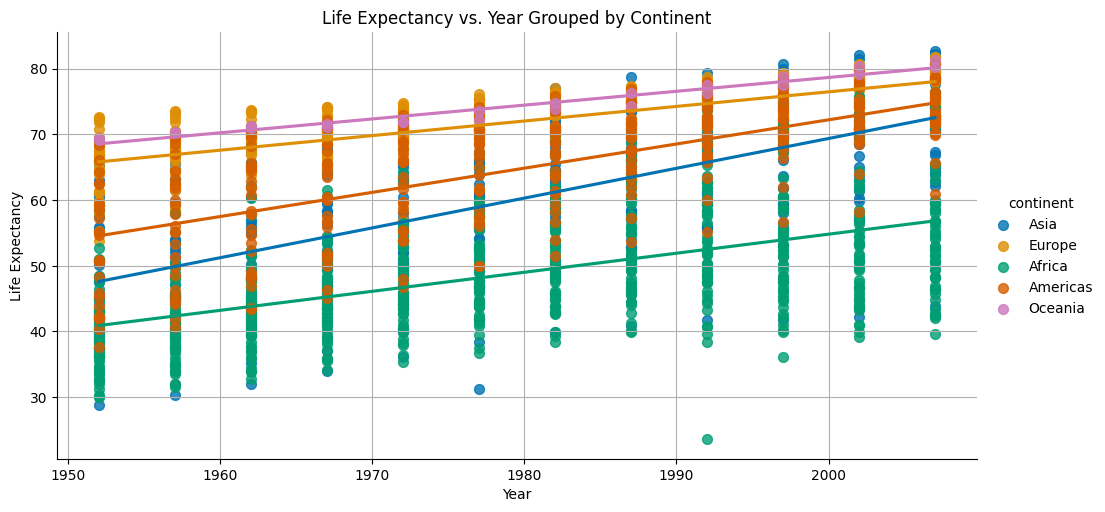

In [89]:
plt.figure(figsize=(12, 8))
sns.lmplot(x='year', y='lifeExp', data=data1, hue='continent', palette='colorblind', aspect=2, ci=None, scatter_kws={"s": 50})
plt.title('Life Expectancy vs. Year Grouped by Continent')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.show()

This code uses lmplot to plot various linear regressions for all the continents.

**Question 10**:  Based on this plot, should your regression model include an interaction term for continent and year? Why?

An interaction term should be included due to how the intercepts are very different for each of the countries.

**Exercise 6**:  Fit a linear regression model for life expectancy including a term for an interaction between continent and year. You may import statsmodel.formula.api to run ordinary least squares for this. 

In [90]:
model2 = sm.formula.ols(formula="lifeExp ~ year + continent + year:continent", data=data1).fit()

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     424.3
Date:                Sun, 31 Mar 2024   Prob (F-statistic):               0.00
Time:                        17:04:38   Log-Likelihood:                -5771.9
No. Observations:                1704   AIC:                         1.156e+04
Df Residuals:                    1694   BIC:                         1.162e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

Create another OLS summary the same was as before.

**Question 11**:  Are all parameters in the model significantly different from zero? If not, which are not significantly different from zero?

The parameters for the Oceania are not significantly different from zero, meaning that they are not statistically accurate.

**Question 12**:  On average, by how much does life expectancy increase each year for each continent? (Provide code to answer this question by extracting relevant estimates from model fit).

In [91]:
coefficients = model2.params


print("Average Increase in Life Expectancy Each Year:")
print("----------------------------------------------")
print("Overall:", coefficients['year'])
print("Americas:", coefficients['year'] + coefficients['year:continent[T.Americas]'])
print("Asia:", coefficients['year'] + coefficients['year:continent[T.Asia]'])
print("Europe:", coefficients['year'] + coefficients['year:continent[T.Europe]'])
print("Oceania:", coefficients['year'] + coefficients['year:continent[T.Oceania]'])

Average Increase in Life Expectancy Each Year:
----------------------------------------------
Overall: 0.2895292630465649
Americas: 0.3676509370649853
Asia: 0.45312240390116143
Europe: 0.22193214452417237
Oceania: 0.21027237762434875


Use print statements to print out the various parameters.

**Exercise 7**:  Perform an F-test that compares how well two models fit your data: (a) the linear regression models from Exercise 2 (only including year as a covariate) and (b) Exercise 6 (including interaction between year and continent).
The F-test is obtained by calling fvalue from the results of exercises 2 and 6.

In [94]:
fvalue_exercise2 = model.fvalue
fvalue_exercise6 = model2.fvalue

f_test_statistic = fvalue_exercise6 / fvalue_exercise2

p_value = model2.compare_f_test(model)[1]

print("F-test statistic:", f_test_statistic)
print("p-value:", p_value)

F-test statistic: 1.0643950101057433
p-value: 0.0


Use the two models and divide one from the other for the f statistic and then compare model 2 to model 1 for the p_value.

**Question 13**:  Is the interaction model significantly better than the year-only model? Why?

The interaction model is signficicantly better as the p-value is less than 0.05 which means that we can reject the null hypothesis of the two being the same or the non interaction being better.

**Exercise 8**:  Make a residuals vs. year violin plot for the interaction model. Comment on how well it matches assumptions of the linear regression model. Do the same for a residuals vs. fitted values model.

/tmp/ipykernel_4109/2740136255.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



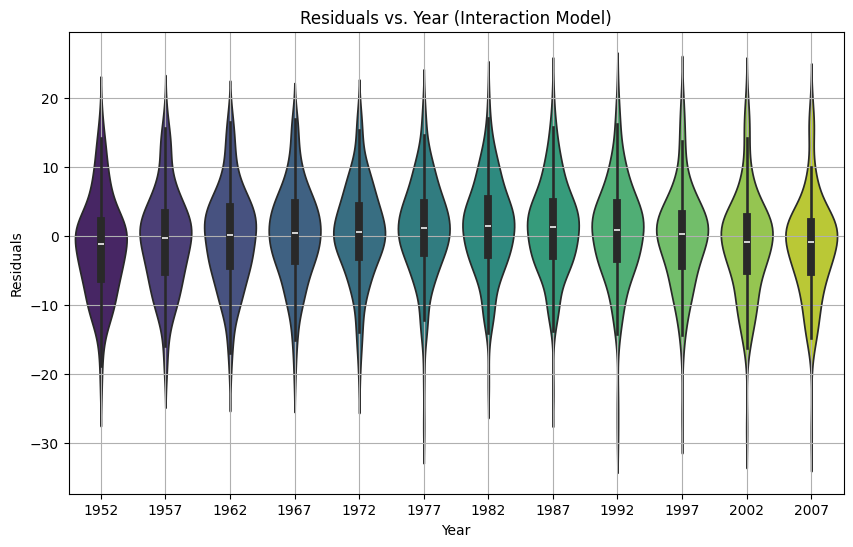

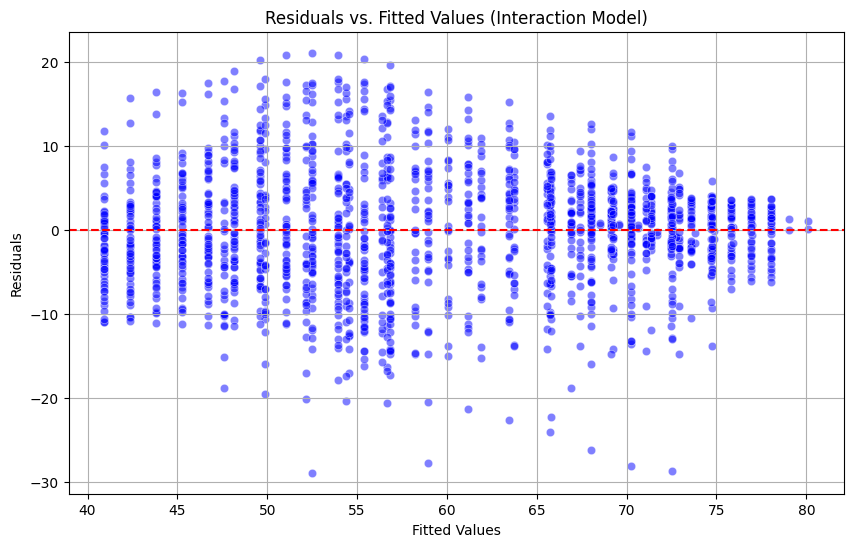

In [95]:
residuals_interaction = model2.resid
fitted_values_interaction = model2.fittedvalues

plt.figure(figsize=(10, 6))
sns.violinplot(x=data1['year'], y=residuals_interaction, palette='viridis')
plt.title('Residuals vs. Year (Interaction Model)')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted_values_interaction, y=residuals_interaction, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Fitted Values (Interaction Model)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

Use the same processes as before to get the interaction model violin plot and scatter plot.